In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
plt.style.use('ggplot')

In [3]:
df=pd.read_csv('D:\python\data_sets\covid.csv')

In [4]:
#1.dataexploratiory and cleaning
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [5]:
# changing the dates in to the datetime format
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

In [6]:
# reseting the index
df.set_index('Sno',inplace=True)

In [7]:
df.describe(include=object)

,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational
count,18110,18110,18110,18110
unique,7,46,62,12
top,8:00 AM,Kerala,-,-
freq,16472,560,17664,17664


In [8]:
df.isnull().sum()

Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [9]:
df.drop(['ConfirmedIndianNational','ConfirmedForeignNational','Time'],axis=1,inplace=True)#removing the columns

In [10]:
df.columns=['date','state','cured','deaths','confirmed']#changing the columns to the lowet case

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18110 entries, 1 to 18110
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       18110 non-null  datetime64[ns]
 1   state      18110 non-null  object        
 2   cured      18110 non-null  int64         
 3   deaths     18110 non-null  int64         
 4   confirmed  18110 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 848.9+ KB


In [12]:
df.shape

(18110, 5)

In [13]:
df.head()

,date,state,cured,deaths,confirmed
Sno,,,,,
1,2020-01-30,Kerala,0,0,1
2,2020-01-31,Kerala,0,0,1
3,2020-02-01,Kerala,0,0,2
4,2020-02-02,Kerala,0,0,3
5,2020-02-03,Kerala,0,0,3


In [14]:
#filtiring the data based on the date
on_date=df[df['date']=='2020-07-17']
on_date.head()

,date,state,cured,deaths,confirmed
Sno,,,,,
4180,2020-07-17,Andaman and Nicobar Islands,133,0,180
4181,2020-07-17,Andhra Pradesh,19393,492,38044
4182,2020-07-17,Arunachal Pradesh,153,3,543
4183,2020-07-17,Assam,12888,48,19754
4184,2020-07-17,Bihar,14018,197,21764


In [15]:
on_date_1=on_date.sort_values(by='confirmed',ascending=False)         #sorting the values by the no.of cases_confirmed on the date
top_states=on_date_1[:5]                                    #the states with highest confirmed cases on_date

In [16]:
on_date_1.head()

,date,state,cured,deaths,confirmed
Sno,,,,,
4199,2020-07-17,Maharashtra,158140,11194,284281
4209,2020-07-17,Tamil Nadu,107416,2236,156369
4188,2020-07-17,Delhi,97693,3545,118645
4195,2020-07-17,Karnataka,19729,1032,51422
4190,2020-07-17,Gujarat,32103,2089,45481


In [17]:
top_states               #the top state_which are having more no.of covid confirmed cases

,date,state,cured,deaths,confirmed
Sno,,,,,
4199,2020-07-17,Maharashtra,158140,11194,284281
4209,2020-07-17,Tamil Nadu,107416,2236,156369
4188,2020-07-17,Delhi,97693,3545,118645
4195,2020-07-17,Karnataka,19729,1032,51422
4190,2020-07-17,Gujarat,32103,2089,45481


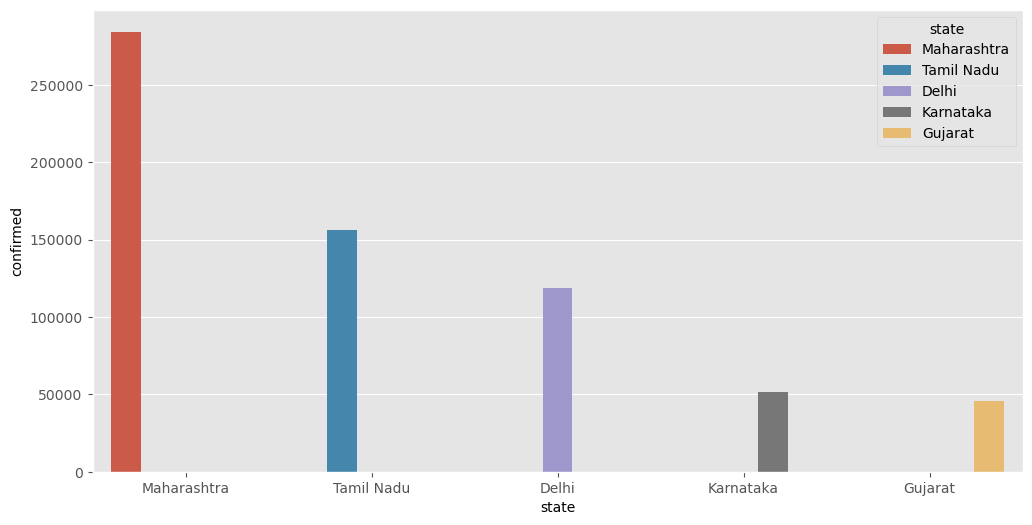

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(x='state',y='confirmed',data=top_states,hue='state')
plt.show()


In [19]:
High_deaths=on_date.sort_values(by='deaths',ascending=False)

In [20]:
high_deaths=High_deaths.head(6)

<Axes: xlabel='state', ylabel='deaths'>

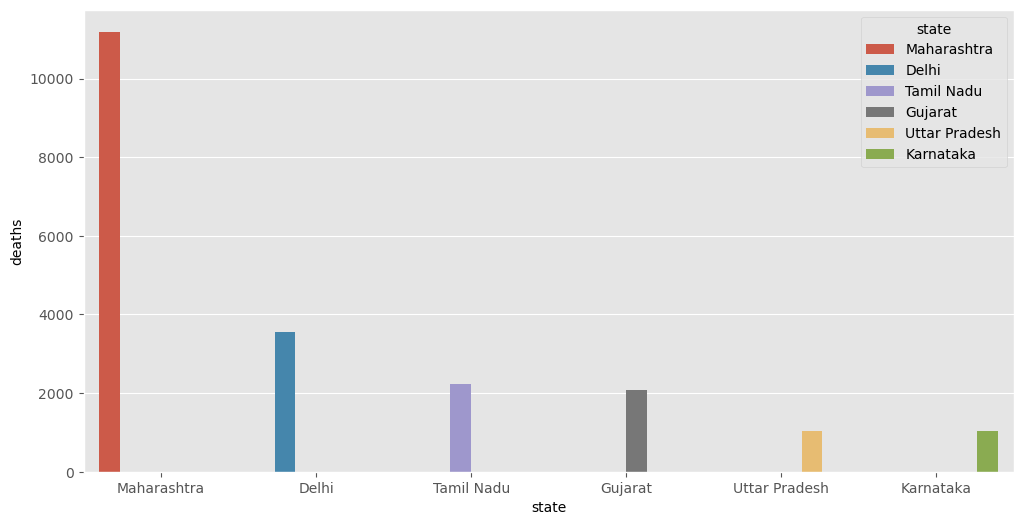

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(x=high_deaths['state'],y=high_deaths['deaths'],data=high_deaths,hue='state')

In [22]:
my_state=df[df['state']=='Telengana']

<Axes: xlabel='date', ylabel='confirmed'>

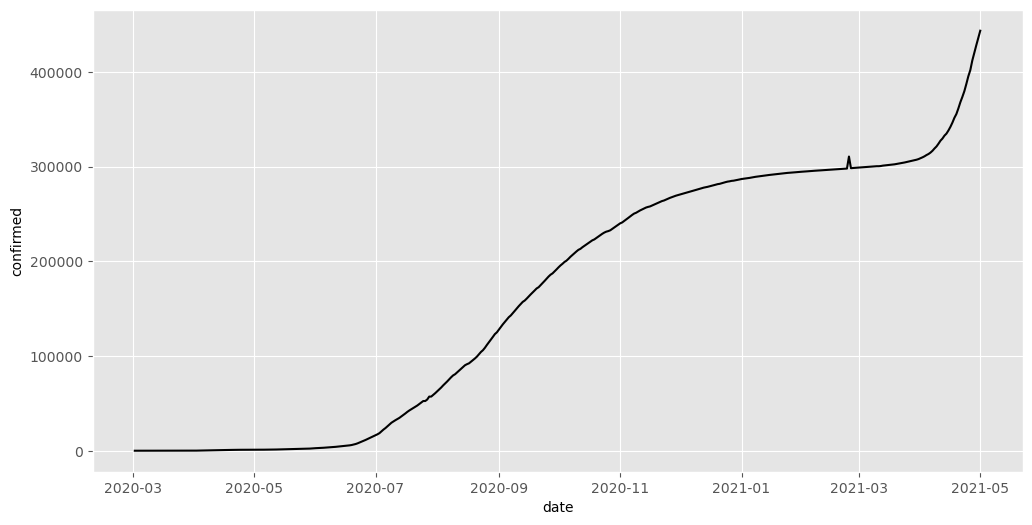

In [23]:
plt.figure(figsize=(12,6))
sns.lineplot(x='date',y='confirmed',data=my_state,color='k')


<Axes: xlabel='date', ylabel='deaths'>

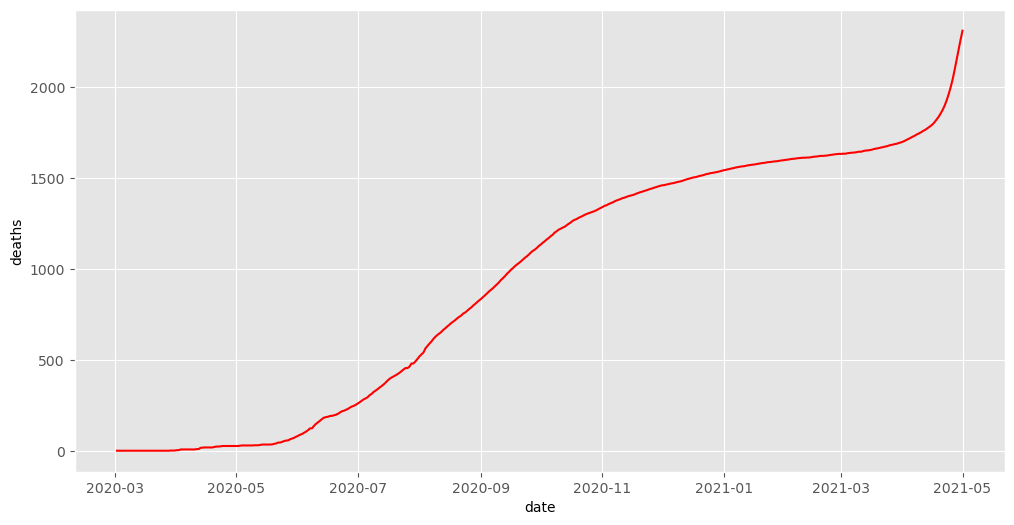

In [24]:

plt.figure(figsize=(12,6))
sns.lineplot(x='date',y='deaths',data=my_state,color='r')
